In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf

In [16]:
df = pd.read_csv("winequality-red.csv",sep=";")
df.head()
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


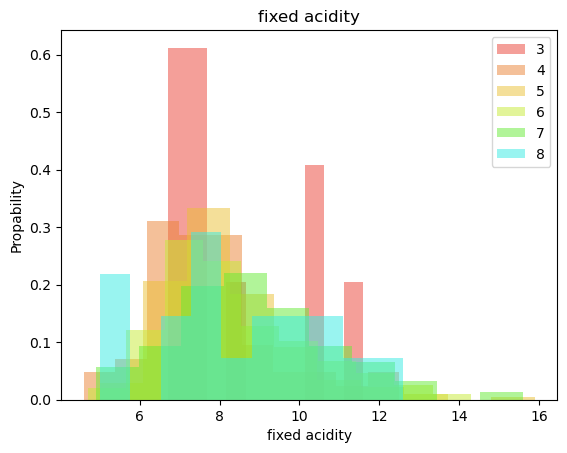

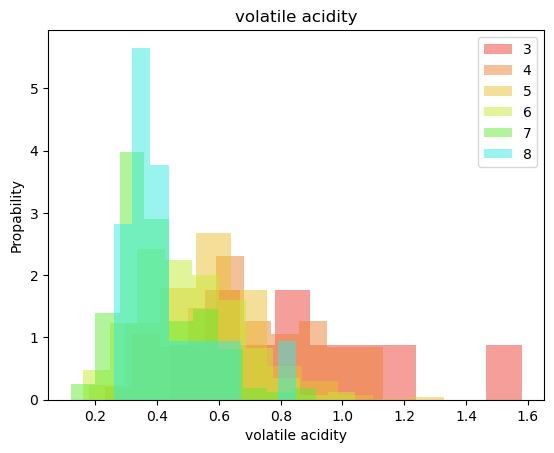

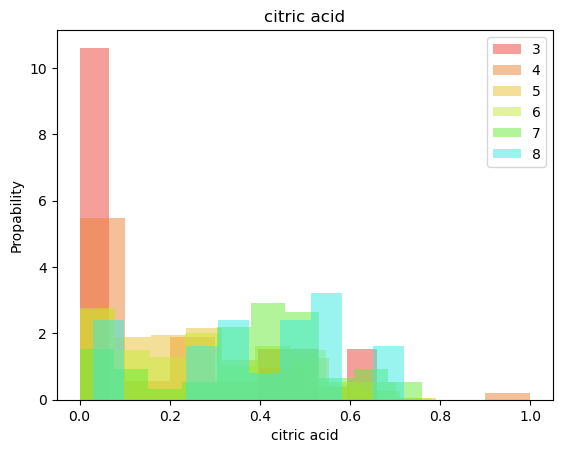

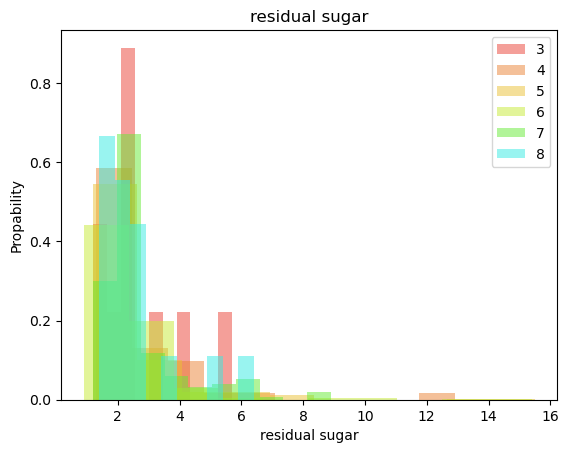

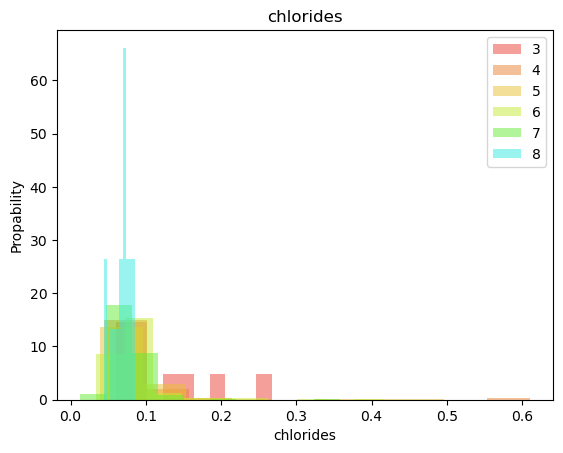

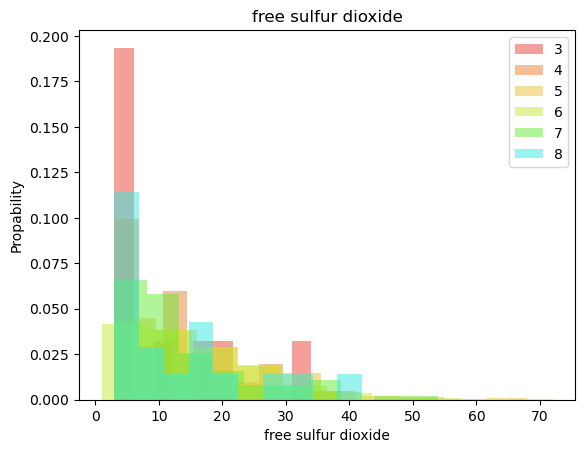

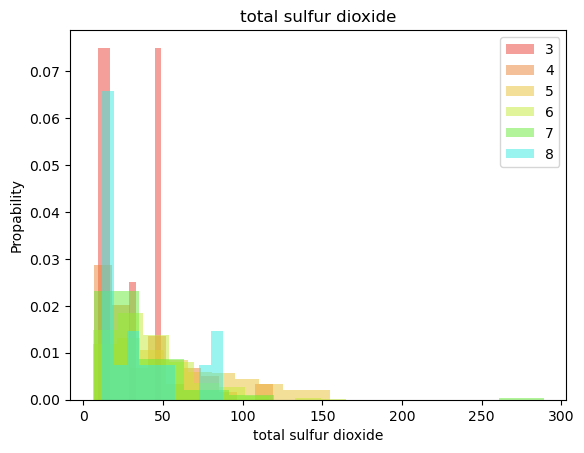

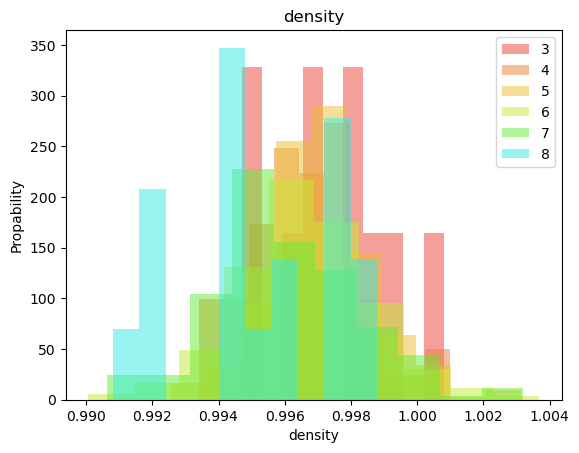

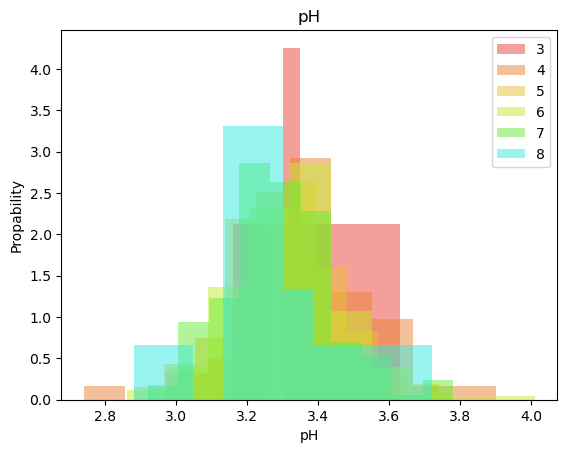

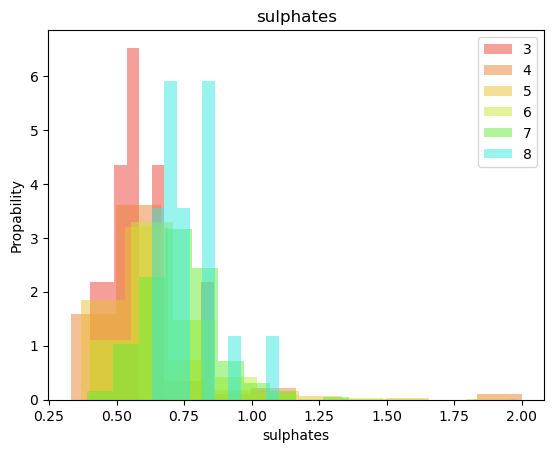

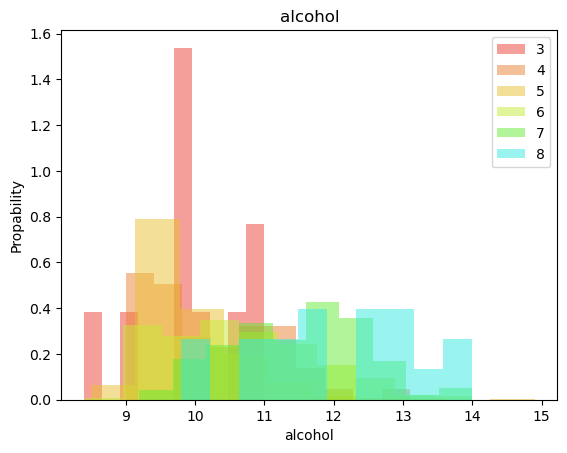

In [72]:
for label in df.columns[:-1]:
    plt.hist(df[df['quality'] == 3][label], color='#eb4034', label=3, alpha=0.5, density=True)
    plt.hist(df[df['quality'] == 4][label], color='#eb8334', label=4, alpha=0.5, density=True)
    plt.hist(df[df['quality'] == 5][label], color='#ebc034', label=5, alpha=0.5, density=True)
    plt.hist(df[df['quality'] == 6][label], color='#c6eb34', label=6, alpha=0.5, density=True)
    plt.hist(df[df['quality'] == 7][label], color='#65eb34', label=7, alpha=0.5, density=True)
    plt.hist(df[df['quality'] == 8][label], color='#34ebe2', label=8, alpha=0.5, density=True)
    plt.title(label)
    plt.ylabel("Propability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [19]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [20]:
def scale_func(dataframe, oversample):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return data, X, y

In [21]:
train, X_train, y_train = scale_func(train, oversample=True)
test, X_test, y_test = scale_func(test, oversample=False)
valid, X_valid, y_valid = scale_func(valid, oversample=False)

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [23]:
y_pred = knn_model.predict(X_test)
print(X_train[0:10])

[[-0.51057879 -0.02670813 -0.01414337 -0.36769993  0.29177949  0.03065567
   0.79218543 -0.55071769 -1.08689791 -0.4957118  -0.96341233]
 [-0.62677363  0.73380795 -1.34994138 -0.23376232 -0.44072451 -0.55342622
  -0.67475263 -0.60341453  0.67589868  0.39463834  0.65737515]
 [-1.09155299 -0.02670813 -0.88754976  0.90470732  0.78011549 -0.16403829
  -0.46082416  0.02894754  1.19820878  0.09785496  0.56203471]
 [-0.04579943  0.57084022  0.03723348 -0.36769993  0.15859694 -1.04016112
   0.94499148  0.38201637 -1.21747543 -0.19892842 -1.24943365]
 [ 1.34853866 -1.22180482  1.16752411 -0.03285591 -0.4629216  -0.94281414
  -0.76643626  1.03018749 -0.36872152  1.2256318   0.27601339]
 [-0.16199427 -0.29832101  0.39687141 -0.23376232 -0.32973906  0.03065567
  -0.64419142 -1.65735131 -0.23814399  0.03849828  1.89680087]
 [-0.27818911  0.1362596  -0.37378129 -0.50163753  0.35837076 -0.35873225
   0.02815519 -0.18183981 -0.82574286  1.64112853 -0.86807189]
 [ 0.8837593   0.67948537  0.65375564  0.

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.21      0.25      0.23        12
           5       0.71      0.69      0.70       144
           6       0.51      0.42      0.46       113
           7       0.42      0.57      0.48        46
           8       0.00      0.00      0.00         4

    accuracy                           0.55       320
   macro avg       0.31      0.32      0.31       320
weighted avg       0.57      0.55      0.56       320


In [25]:
# after iteration of n_neighbors, we could see that knn model shows bad results for quality prediction

In [26]:
naive_b_model = GaussianNB()
naive_b_model = naive_b_model.fit(X_train, y_train)

In [27]:
y_pred = naive_b_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.05      0.42      0.09        12
           5       0.81      0.44      0.57       144
           6       0.56      0.17      0.26       113
           7       0.34      0.33      0.33        46
           8       0.02      0.25      0.04         4

    accuracy                           0.33       320
   macro avg       0.30      0.27      0.22       320
weighted avg       0.61      0.33      0.40       320


In [ ]:
# Now let's use tensorflow to build NN model

In [71]:
class DenseLayer(tf.keras.layers.Layer):
    def __init__(self, units=1):
        super().__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,), initializer="zeros")

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

class NN2Layers(tf.keras.Model):
    def __init__(self, neurons_number1, neurons_number2):
        super().__init__()
        self.layer1 = DenseLayer(neurons_number1)
        self.layer2 = DenseLayer(neurons_number2)

    def call(self, inputs):
        x = self.layer1(inputs)
        x = tf.nn.relu(x)
        print(x, "units: ", inputs)
        x = self.layer2(x)
        x = tf.nn.softmax(x)
        return x
    
 
y_train_mapped = np.array(y_train) - 3
num_classes = len(np.unique(y_train_mapped))
y_train_cat = tf.keras.utils.to_categorical(y_train_mapped, num_classes=6)
y_test_mapped = y_test - 3
y_test_cat = tf.keras.utils.to_categorical(y_test_mapped, num_classes=6)

model = NN2Layers(128, num_classes)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

model.fit(X_train, y_train_cat, batch_size=32, epochs=100, validation_split=0.2)
print(model.evaluate(X_test, y_test_cat))

Epoch 1/100
Tensor("nn2_layers_23/Relu:0", shape=(None, 128), dtype=float32) units:  Tensor("IteratorGetNext:0", shape=(None, 11), dtype=float32)
Tensor("nn2_layers_23/Relu:0", shape=(None, 128), dtype=float32) units:  Tensor("IteratorGetNext:0", shape=(None, 11), dtype=float32)
63/63 [==============================] - 1s 4ms/step - loss: 1.5712 - accuracy: 0.4227 - val_loss: 2.4685 - val_accuracy: 0.1265
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 1.1954 - accuracy: 0.5542 - val_loss: 3.5379 - val_accuracy: 0.1325
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 1.0374 - accuracy: 0.5909 - val_loss: 3.9837 - val_accuracy: 0.1345
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.9660 - accuracy: 0.6175 - val_loss: 4.2655 - val_accuracy: 0.1225
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.9181 - accuracy: 0.6345 - val_loss: 4.2428 - val_accuracy: 0.1265
Epoch 6/100
63/63 [========

In [29]:
# So we can see that results of prediction much better, accuracy is about 0.615 